In [1]:
print("Hare Krishna")

Hare Krishna


# Predicting heart disease Using Machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model to predict wheather not someone has heart disease using there medical records

# Steps :-
1. Problem defination
2. Data
3. Evaluating
4. Features
5. modelling
6. Experimentation

## 1.Problem defination

in a statement,
> Given medical records can we predict they have heart disease or not

## 2.Data Came from Kaggle FYI it's a great place for datasets

## 3.Evaluation(what defines our success)

> if we can reach 95% accuracy in predicting heart-disease then we'll pursue it for industrial level

## 4.Features

**Creating data dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

# Preparing ML Tools

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

# Data Exploration(Exploratory data analysis or EDA)

the goal is to find out more about the data and dataset to become a subject matter expert in the dataset in which I am working on.

1. what is the problem are we trying to solve.
2. what kind of data we have and to treat them string,object,int,etc howdo we treat them.
3. what is missing and how to treat them.
4. what are the outliners(the sample values that are too far away from normal sample values) and why i would care about them.
5. how can we add,change or remove features to get clarity on our data.

In [3]:
df=pd.read_csv("heart.csv")
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

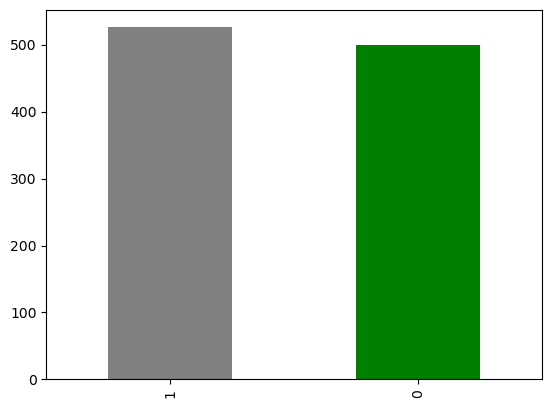

In [7]:
df["target"].value_counts().plot(kind="bar",color=["grey","green"])

In [8]:
df.chol.value_counts()

204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: chol, Length: 152, dtype: int64

# compare target column with chol column

In [9]:
pd.crosstab(df.chol,df.target)

target,0,1
chol,,
126,0,3
131,3,0
141,0,3
149,4,4
157,0,4
...,...,...
394,0,3
407,4,0
409,3,0


# compare sex with target

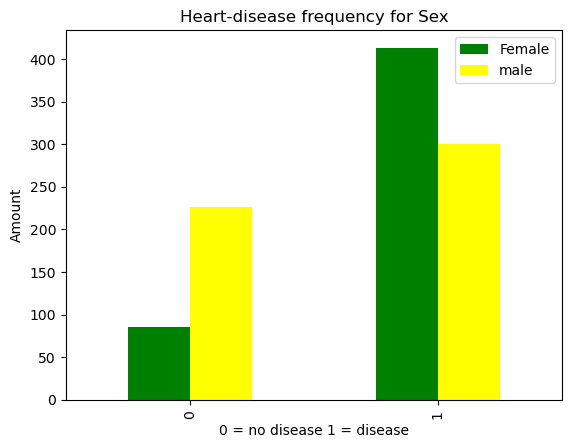

In [10]:
pd.crosstab(df.sex,df.target).plot(kind="bar",color=["green","yellow"])
plt.title("Heart-disease frequency for Sex")
plt.xlabel("0 = no disease 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female","male"])

## we are trying to be subject matter expert on the Data

# trying to find pattern with age thalach

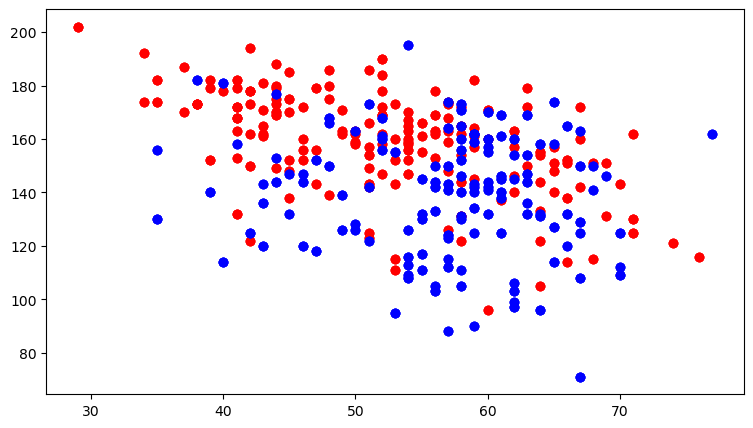

In [11]:
plt.figure(figsize=(9,5))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red")

plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="blue")

<AxesSubplot:ylabel='Frequency'>

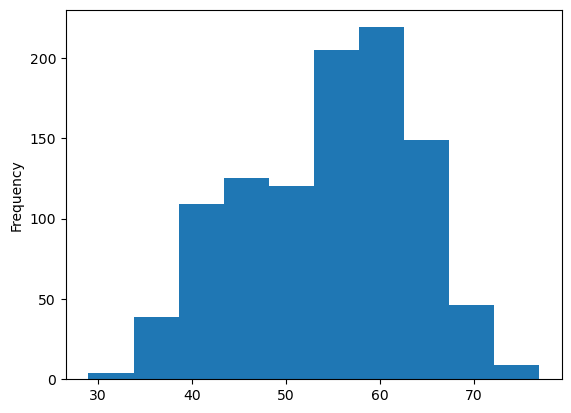

In [12]:
df.age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

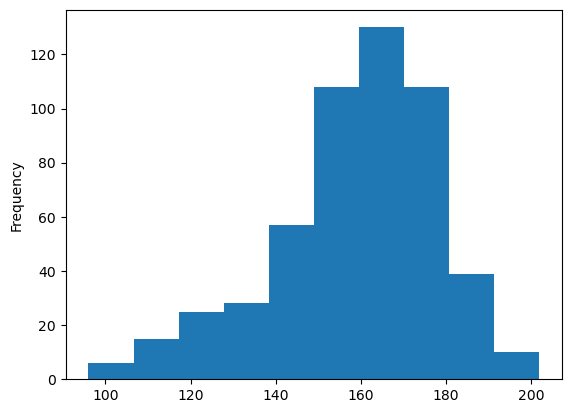

In [13]:
df.thalach[df.target==1].plot.hist()

<AxesSubplot:xlabel='cp'>

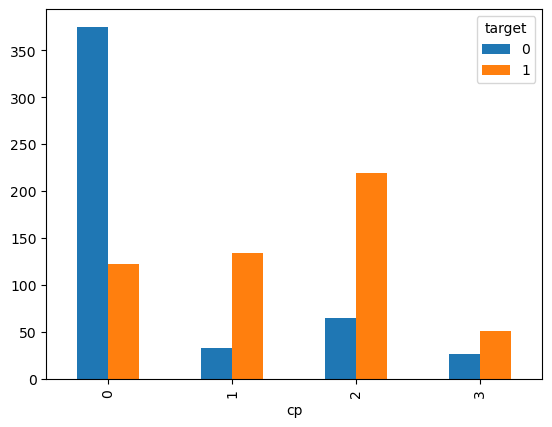

In [14]:
pd.crosstab(df.cp,df.target).plot(kind="bar")

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


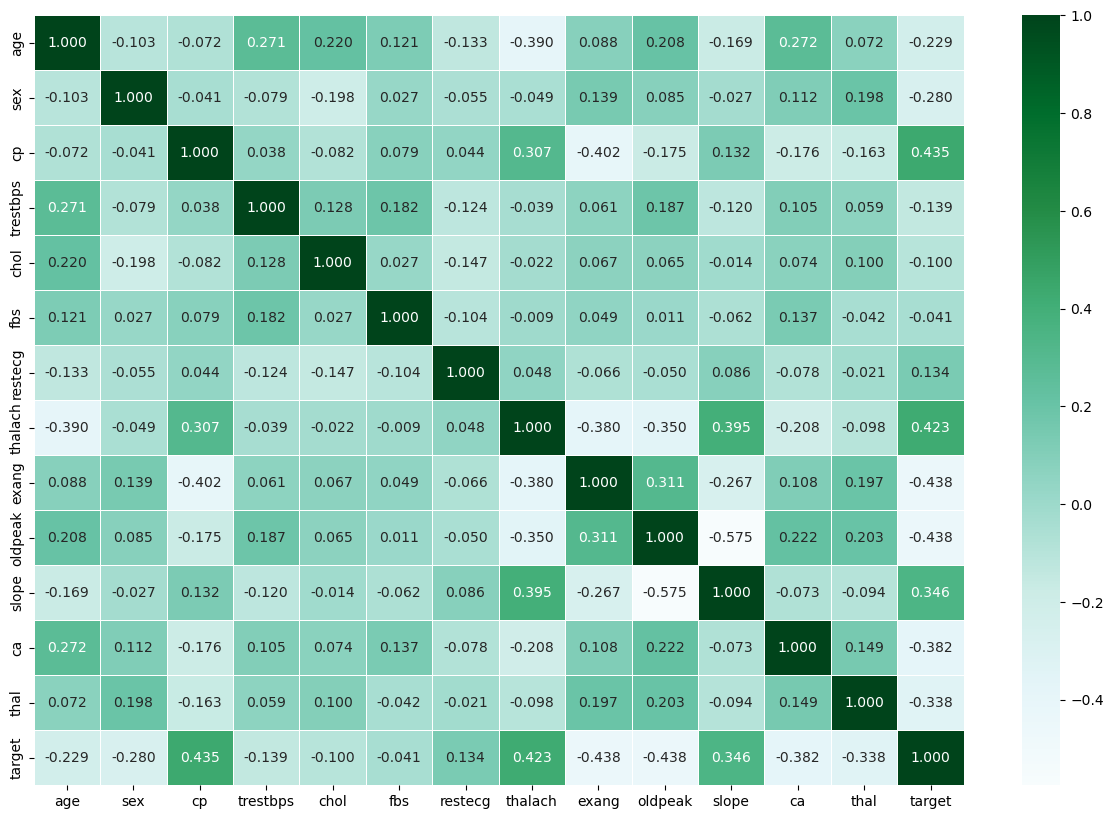

In [ ]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(13,10))
ax=sns.heatmap(corr_matrix,linewidth=0.5,fmt=".3f",cmap="BuGn")